<a href="https://colab.research.google.com/github/Samuel-Schlemper-Schlemuel/CatVsDog/blob/main/CatvsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, ELU
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from google.colab.patches import cv2_imshow
import cv2

In [19]:
img_dir = '/content/drive/MyDrive/Programação/Códigos  "próprios"/CatVsDog/PetImages'
img_list = []

In [20]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [21]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
training_set = train_datagen.flow_from_directory(img_dir + '/Train_data',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 22000 images belonging to 2 classes.


In [23]:
test_set = test_datagen.flow_from_directory(img_dir + '/Test_data',   
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 3019 images belonging to 2 classes.


In [24]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='elu', input_shape = (64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='elu'))
model.add(Dense(units=1, activation='sigmoid'))

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(training_set,
                  steps_per_epoch = 22000/36,
                  epochs = 15,
                  validation_data = test_set,
                  validation_steps = 3019/36)

Epoch 1/15
611/611 [==============================] - 125s 200ms/step - loss: 0.5911 - accuracy: 0.6843 - val_loss: 0.5526 - val_accuracy: 0.7176
Epoch 2/15
611/611 [==============================] - 110s 180ms/step - loss: 0.5134 - accuracy: 0.7459 - val_loss: 0.4725 - val_accuracy: 0.7660
Epoch 3/15
611/611 [==============================] - 107s 175ms/step - loss: 0.4862 - accuracy: 0.7632 - val_loss: 0.4523 - val_accuracy: 0.7946
Epoch 4/15
611/611 [==============================] - 108s 176ms/step - loss: 0.4594 - accuracy: 0.7826 - val_loss: 0.4086 - val_accuracy: 0.8043
Epoch 5/15
611/611 [==============================] - 108s 176ms/step - loss: 0.4386 - accuracy: 0.7938 - val_loss: 0.4346 - val_accuracy: 0.7954
Epoch 6/15
611/611 [==============================] - 106s 174ms/step - loss: 0.4139 - accuracy: 0.8086 - val_loss: 0.4437 - val_accuracy: 0.7920
Epoch 7/15
611/611 [==============================] - 107s 176ms/step - loss: 0.3933 - accuracy: 0.8214 - val_loss: 0.3707 -

1/1 [==============================] - 0s 68ms/step


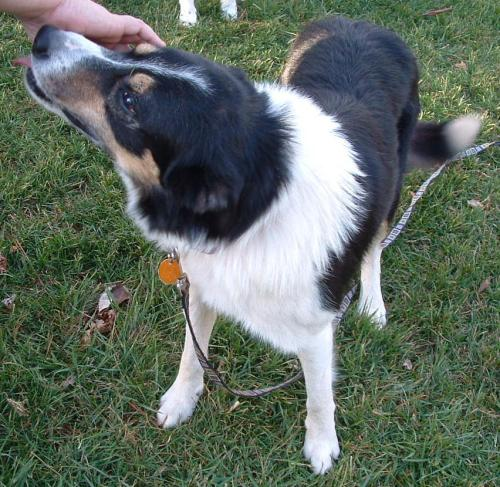

Cachorro


In [27]:
image_link = img_dir + '/Test_data/Dog/11358.jpg'
test_image = load_img(image_link, target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if round(result[0][0]) == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'
  
cv2_imshow(cv2.imread(image_link))
print(prediction)

1/1 [==============================] - 0s 21ms/step


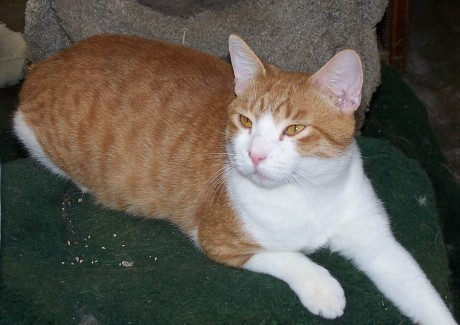

Gato


In [28]:
image_link = img_dir + '/Test_data/Cat/11370.jpg'
test_image = load_img(image_link, target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if round(result[0][0]) == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'
  
cv2_imshow(cv2.imread(image_link))
print(prediction)